# Calculations related to the DM IGM [v2]
    v1 -- These were presented in Macquart+2020 (more or less)
    v2 -- A few updates

In [35]:
#%matplotlib notebook

In [36]:
# imports
from importlib import reload
import numpy as np
import os

from pkg_resources import resource_filename

from matplotlib import pyplot as plt

from scipy import interpolate

from astropy import units
from astropy.table import Table
from astropy.cosmology import Planck15

from frb.dm import igm

## DM -- Piece by piece (as coded)

### $\rho_b = \Omega_b \rho_c (1+z)^3$

### $\rho_{\rm diffuse} = \rho_b - (\rho_* + \rho_{\rm ISM})$


#### $\rho_*$ is the mass density in stars

#### $\rho_{\rm ISM}$ is the mass density in the neutral ISM

### Number densities

### $n_{\rm H} = \rho_{\rm diffuse}/(m_p \, \mu)$

#### $\mu \approx 1.3$ accounts for Helium

### $n_{\rm He} = n_{\rm H}/12$

### $n_e = n_{\rm H} [1-f_{\rm HI}] + n_{\rm He} Y$

#### $f_{\rm HI}$ is the fraction atomic Hydrogen [value betwee 0-1]

#### $Y$ gives the number of free electrons per He nucleus  [value between 0-2]

### Integrating

### $DM = \int \frac{n_e \, dr}{1+z} = \frac{c}{H_0} \int \frac{n_e \, dz}{(1+z)^2 \sqrt{(1+z)^3 \Omega_m + 
                                                                                 \Omega_\Lambda}}$

## DM -- Altogether (using the code)

In [37]:
reload(igm)
DM = igm.average_DM(1.)
DM

<Quantity 921.9988935 pc / cm3>

### Cumulative plot

In [38]:
DM_cumul, zeval = igm.average_DM(1., cumul=True)

In [39]:
# Inoue approximation
DM_approx = 1000. * zeval * units.pc / units.cm**3

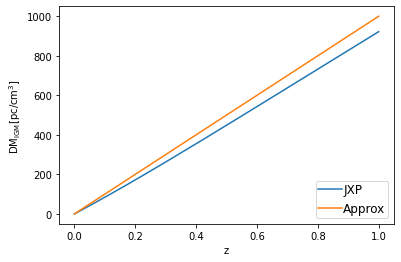

In [40]:
plt.clf()
ax = plt.gca()
ax.plot(zeval, DM_cumul, label='JXP')
ax.plot(zeval, DM_approx, label='Approx')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'${\rm DM}_{\rm IGM} [\rm pc / cm^3]$ ')
# Legend
legend = plt.legend(loc='lower right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

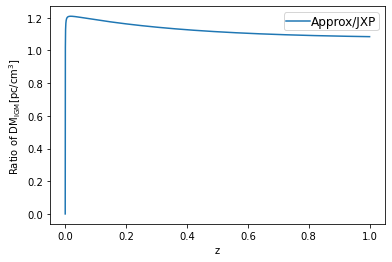

In [41]:
plt.clf()
ax = plt.gca()
ax.plot(zeval, DM_approx/DM_cumul, label='Approx/JXP')
#ax.plot(zeval, DM_approx, label='Approx')
# Label
ax.set_xlabel('z')
ax.set_ylabel(r'Ratio of ${\rm DM}_{\rm IGM} [\rm pc / cm^3]$ ')
# Legend
legend = plt.legend(loc='upper right', scatterpoints=1, borderpad=0.2,
                       handletextpad=0.1, fontsize='large')
plt.show()

In [42]:
DM_cumul[0:10]

<Quantity [0.08178449, 0.16357399, 0.24536851, 0.32716805, 0.40897261,
           0.49078218, 0.57259677, 0.65441636, 0.73624097, 0.81807058] pc / cm3>

In [43]:
DM_approx[0:10]

<Quantity [0.        , 0.10001   , 0.20002   , 0.30003   , 0.40004   ,
           0.50005001, 0.60006001, 0.70007001, 0.80008001, 0.90009001] pc / cm3>

In [44]:
zeval[0]

0.0

----

## Development